# 1. Importing necessary Libraries

In [1]:
import pandas as pnd
import numpy as nmp
import matplotlib.pyplot as mplt
import seaborn as sbrn
import sklearn.feature_selection as fs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
import warnings

In [2]:
warnings.filterwarnings("ignore")

# 2. Loading Data

In [3]:
pnd_data_frame=pnd.read_csv("kag_risk_factors_cervical_cancer.csv")

# 3. Exploratory Data Analysis

In [4]:
pnd_data_frame.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [5]:
pnd_data_frame.head(7)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1


In [6]:
pnd_data_frame.tail(7)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
851,23,2.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
852,43,3.0,17.0,3.0,0.0,0.0,0.0,1.0,5.0,0.0,...,?,?,0,0,0,0,0,0,0,0
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0
857,29,2.0,20.0,1.0,0.0,0.0,0.0,1.0,0.5,0.0,...,?,?,0,0,0,0,0,0,0,0


In [7]:
pnd_data_frame.sample(7)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
176,27,1.0,19.0,1.0,0.0,0.0,0.0,?,?,?,...,?,?,0,0,0,0,0,0,0,0
686,35,5.0,19.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,1,0,1
519,19,1.0,17.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,...,?,?,0,0,0,0,0,0,0,0
503,37,3.0,16.0,5.0,0.0,0.0,0.0,1.0,4.0,1.0,...,?,?,0,0,0,0,0,0,0,0
92,33,4.0,16.0,3.0,0.0,0.0,0.0,1.0,8.0,1.0,...,?,?,0,0,0,0,0,0,0,0
505,23,2.0,17.0,3.0,0.0,0.0,0.0,?,?,?,...,?,?,0,0,0,0,0,0,0,0
515,31,4.0,15.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [8]:
pnd_data_frame.shape

(858, 36)

In [9]:
#
#count=0
#for r, s in pnd_data_frame.iterrows():
#    for r in s:
#        if r=="?":
#            r.replace("?", df_mean)
#            count+=1
#            print("Okay")
#print(count)

In [10]:
count=0
count1=0
print("Name of the columns\n")
for col, val in pnd_data_frame.items():
    print(col)
    for i in val:
        count1+=1
    count+=1
print('''\nTotal Number of rows and columns are {} and {} respectively 
      in Cervical Cancer Dataset.'''.format(int(count1/36), count))

Name of the columns

Age
Number of sexual partners
First sexual intercourse
Num of pregnancies
Smokes
Smokes (years)
Smokes (packs/year)
Hormonal Contraceptives
Hormonal Contraceptives (years)
IUD
IUD (years)
STDs
STDs (number)
STDs:condylomatosis
STDs:cervical condylomatosis
STDs:vaginal condylomatosis
STDs:vulvo-perineal condylomatosis
STDs:syphilis
STDs:pelvic inflammatory disease
STDs:genital herpes
STDs:molluscum contagiosum
STDs:AIDS
STDs:HIV
STDs:Hepatitis B
STDs:HPV
STDs: Number of diagnosis
STDs: Time since first diagnosis
STDs: Time since last diagnosis
Dx:Cancer
Dx:CIN
Dx:HPV
Dx
Hinselmann
Schiller
Citology
Biopsy

Total Number of rows and columns are 858 and 36 respectively 
      in Cervical Cancer Dataset.


### cleaning

In [4]:
pnd_data_frame.isnull().sum().sum()

0

In [5]:
pnd_data_frame=pnd_data_frame.replace("?", nmp.NaN)

In [6]:
print("Total number of null values in the datasets are {}". format(pnd_data_frame.isnull().sum().sum()))

Total number of null values in the datasets are 3622


In [8]:
pnd_data_frame.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [10]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

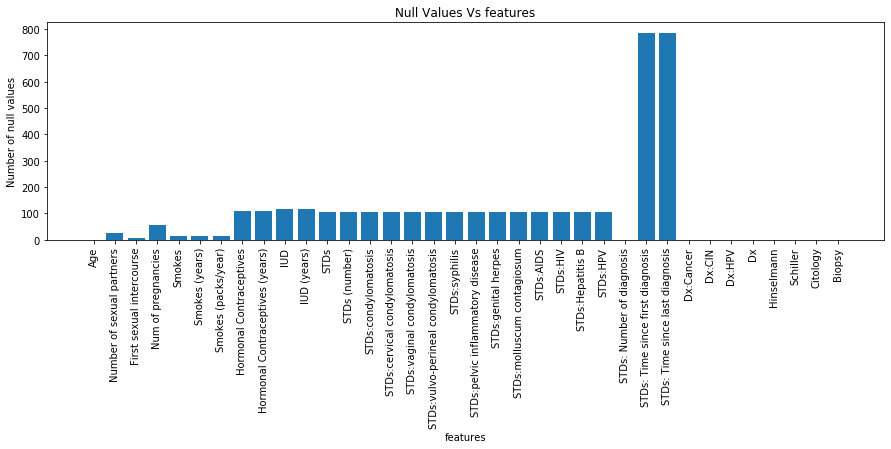

In [11]:
mplt.figure(figsize=(15, 4))
mplt.xticks(rotation=90)
mplt.bar(pnd_data_frame.columns, pnd_data_frame.isna().sum());
mplt.xlabel("features")
mplt.ylabel("Number of null values")
mplt.title("Null Values Vs features");
mplt.savefig("nullfeature.png")

In [17]:
##too many null values in 2 columns i.e. STDs: Time since first diagnosis and STDs: Time since last diagnosis
## better to delete these 2 useless columns

In [12]:
pnd_data_frame=pnd_data_frame.drop(columns=["STDs: Time since first diagnosis"])
pnd_data_frame=pnd_data_frame.drop(columns=["STDs: Time since last diagnosis"])

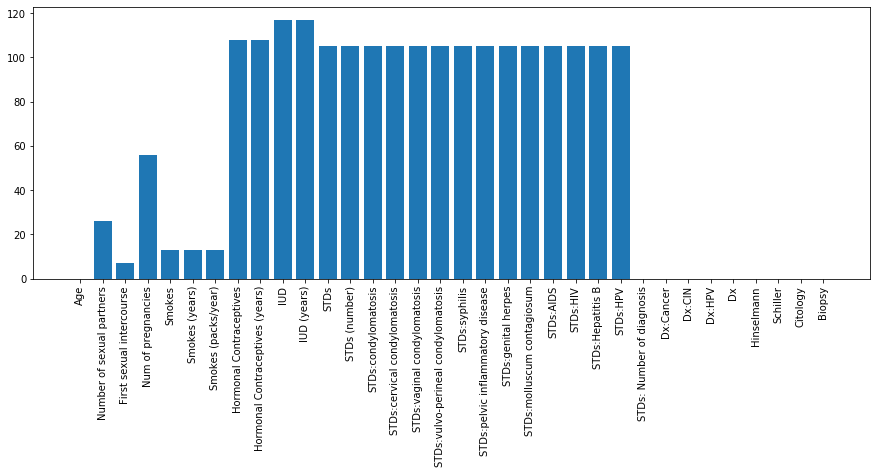

In [13]:
mplt.figure(figsize=(15, 5))
mplt.xticks(rotation=90)
mplt.bar(pnd_data_frame.columns, pnd_data_frame.isna().sum());

In [14]:
c_numerical=pnd_data_frame.select_dtypes(include="int64")
for m, n in enumerate(c_numerical.columns, start=1):
    print(m, n)

1 Age
2 STDs: Number of diagnosis
3 Dx:Cancer
4 Dx:CIN
5 Dx:HPV
6 Dx
7 Hinselmann
8 Schiller
9 Citology
10 Biopsy


In [15]:
c_obj=pnd_data_frame.select_dtypes(include=object)
for o, p in enumerate(c_obj.columns, start=1):
    print(o, p)
#print(c_obj.columns)

1 Number of sexual partners
2 First sexual intercourse
3 Num of pregnancies
4 Smokes
5 Smokes (years)
6 Smokes (packs/year)
7 Hormonal Contraceptives
8 Hormonal Contraceptives (years)
9 IUD
10 IUD (years)
11 STDs
12 STDs (number)
13 STDs:condylomatosis
14 STDs:cervical condylomatosis
15 STDs:vaginal condylomatosis
16 STDs:vulvo-perineal condylomatosis
17 STDs:syphilis
18 STDs:pelvic inflammatory disease
19 STDs:genital herpes
20 STDs:molluscum contagiosum
21 STDs:AIDS
22 STDs:HIV
23 STDs:Hepatitis B
24 STDs:HPV


In [16]:
pnd_data_frame

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [18]:
pnd_data_frame=pnd_data_frame.apply(pnd.to_numeric)

In [19]:
pnd_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [25]:
round(pnd_data_frame.mean(), 3)

Age                                   26.821
Number of sexual partners              2.528
First sexual intercourse              16.995
Num of pregnancies                     2.276
Smokes                                 0.146
Smokes (years)                         1.220
Smokes (packs/year)                    0.453
Hormonal Contraceptives                0.641
Hormonal Contraceptives (years)        2.256
IUD                                    0.112
IUD (years)                            0.515
STDs                                   0.105
STDs (number)                          0.177
STDs:condylomatosis                    0.058
STDs:cervical condylomatosis           0.000
STDs:vaginal condylomatosis            0.005
STDs:vulvo-perineal condylomatosis     0.057
STDs:syphilis                          0.024
STDs:pelvic inflammatory disease       0.001
STDs:genital herpes                    0.001
STDs:molluscum contagiosum             0.001
STDs:AIDS                              0.000
STDs:HIV  

In [26]:
import math
count=0
for r, s in pnd_data_frame.iterrows():
    for r in s:
        if r==math.isnan(0):
            count+=1
print(count)

21661


In [20]:
pnd_data_frame["Number of sexual partners"].isna().sum()

26

In [21]:
pnd_data_frame=pnd_data_frame.fillna(round(pnd_data_frame.mean(), 3))
pnd_data_frame.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [22]:
pnd_data_frame.duplicated().sum()

23

In [23]:
pnd_data_frame=pnd_data_frame.drop_duplicates()

In [24]:
pnd_data_frame.shape

(835, 34)

# Visualisation

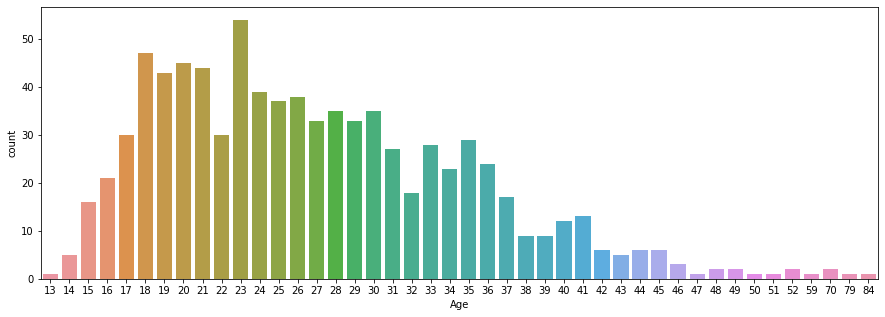

In [32]:
mplt.figure(figsize=(15,5))
sbrn.countplot(x="Age", data=pnd_data_frame);

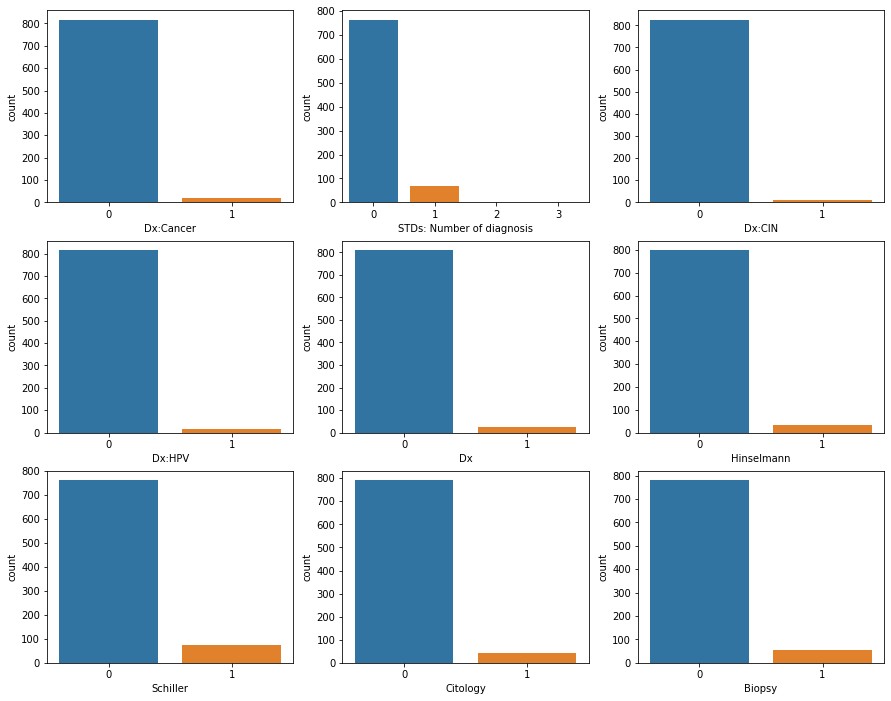

In [25]:
f, axs=mplt.subplots(3, 3, figsize=(15,12))
sbrn.countplot(x="Dx:Cancer", data=pnd_data_frame, ax=axs[0,0]);
sbrn.countplot(x="STDs: Number of diagnosis", data=pnd_data_frame, ax=axs[0,1]);
sbrn.countplot(x="Dx:CIN", data=pnd_data_frame, ax=axs[0,2]);
sbrn.countplot(x="Dx:HPV", data=pnd_data_frame, ax=axs[1,0]);
sbrn.countplot(x="Dx", data=pnd_data_frame, ax=axs[1,1]);
sbrn.countplot(x="Hinselmann", data=pnd_data_frame, ax=axs[1,2]);
sbrn.countplot(x="Schiller", data=pnd_data_frame, ax=axs[2,0]);
sbrn.countplot(x="Citology", data=pnd_data_frame, ax=axs[2,1]);
sbrn.countplot(x="Biopsy", data=pnd_data_frame, ax=axs[2,2]);

### Density Plot

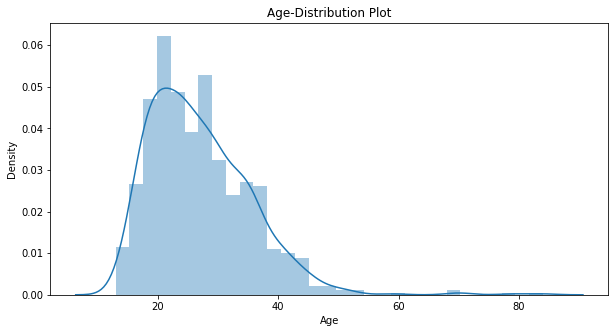

In [26]:
mplt.figure(figsize=(10, 5))
sbrn.distplot(pnd_data_frame["Age"]);
mplt.title("Age-Distribution Plot");

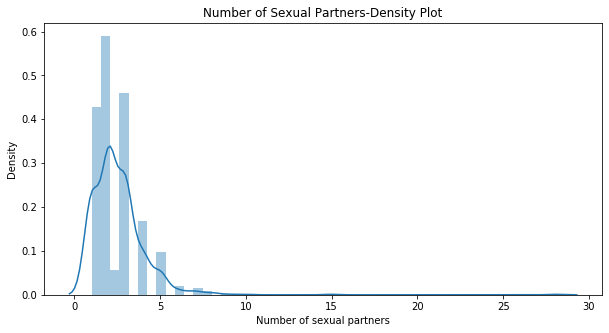

In [27]:
mplt.figure(figsize=(10, 5))
sbrn.distplot(pnd_data_frame["Number of sexual partners"]);
mplt.title("Number of Sexual Partners-Density Plot");

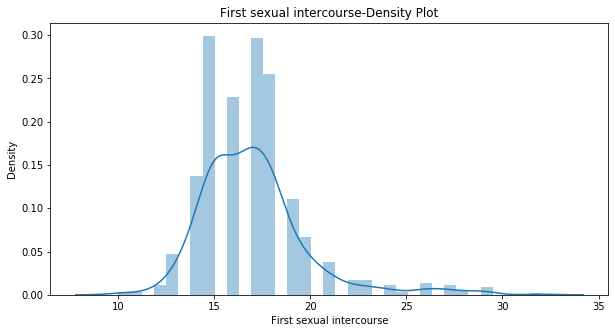

In [28]:
mplt.figure(figsize=(10, 5))
sbrn.distplot(pnd_data_frame["First sexual intercourse"]);
mplt.title("First sexual intercourse-Density Plot");

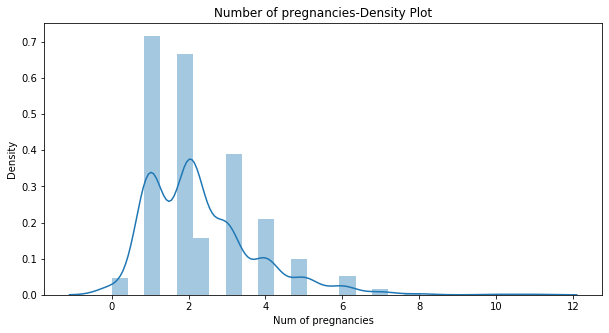

In [29]:
mplt.figure(figsize=(10, 5))
sbrn.distplot(pnd_data_frame["Num of pregnancies"]);
mplt.title("Number of pregnancies-Density Plot");

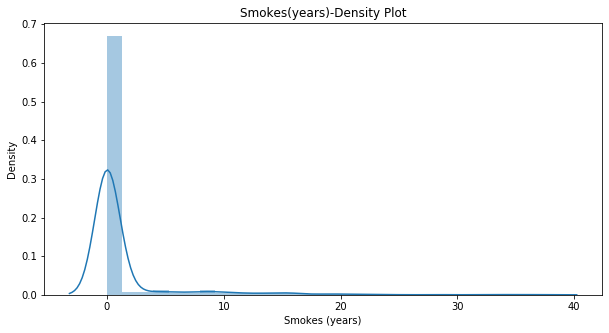

In [38]:
mplt.figure(figsize=(10, 5))
sbrn.distplot(pnd_data_frame["Smokes (years)"]);
mplt.title("Smokes(years)-Density Plot");

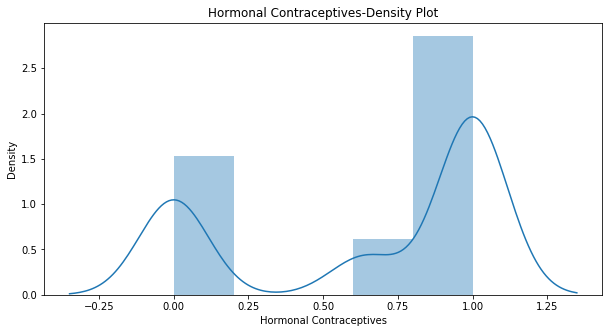

In [39]:
mplt.figure(figsize=(10, 5))
sbrn.distplot(pnd_data_frame["Hormonal Contraceptives"]);
mplt.title("Hormonal Contraceptives-Density Plot");

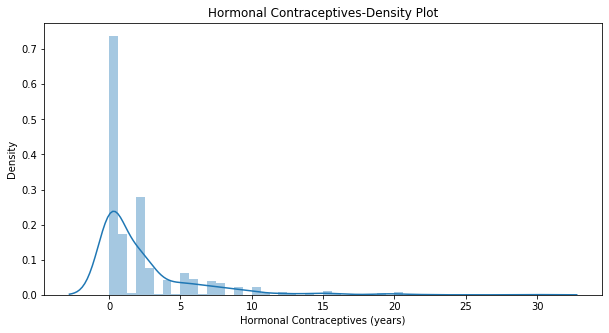

In [40]:
mplt.figure(figsize=(10, 5))
sbrn.distplot(pnd_data_frame["Hormonal Contraceptives (years)"]);
mplt.title("Hormonal Contraceptives-Density Plot");

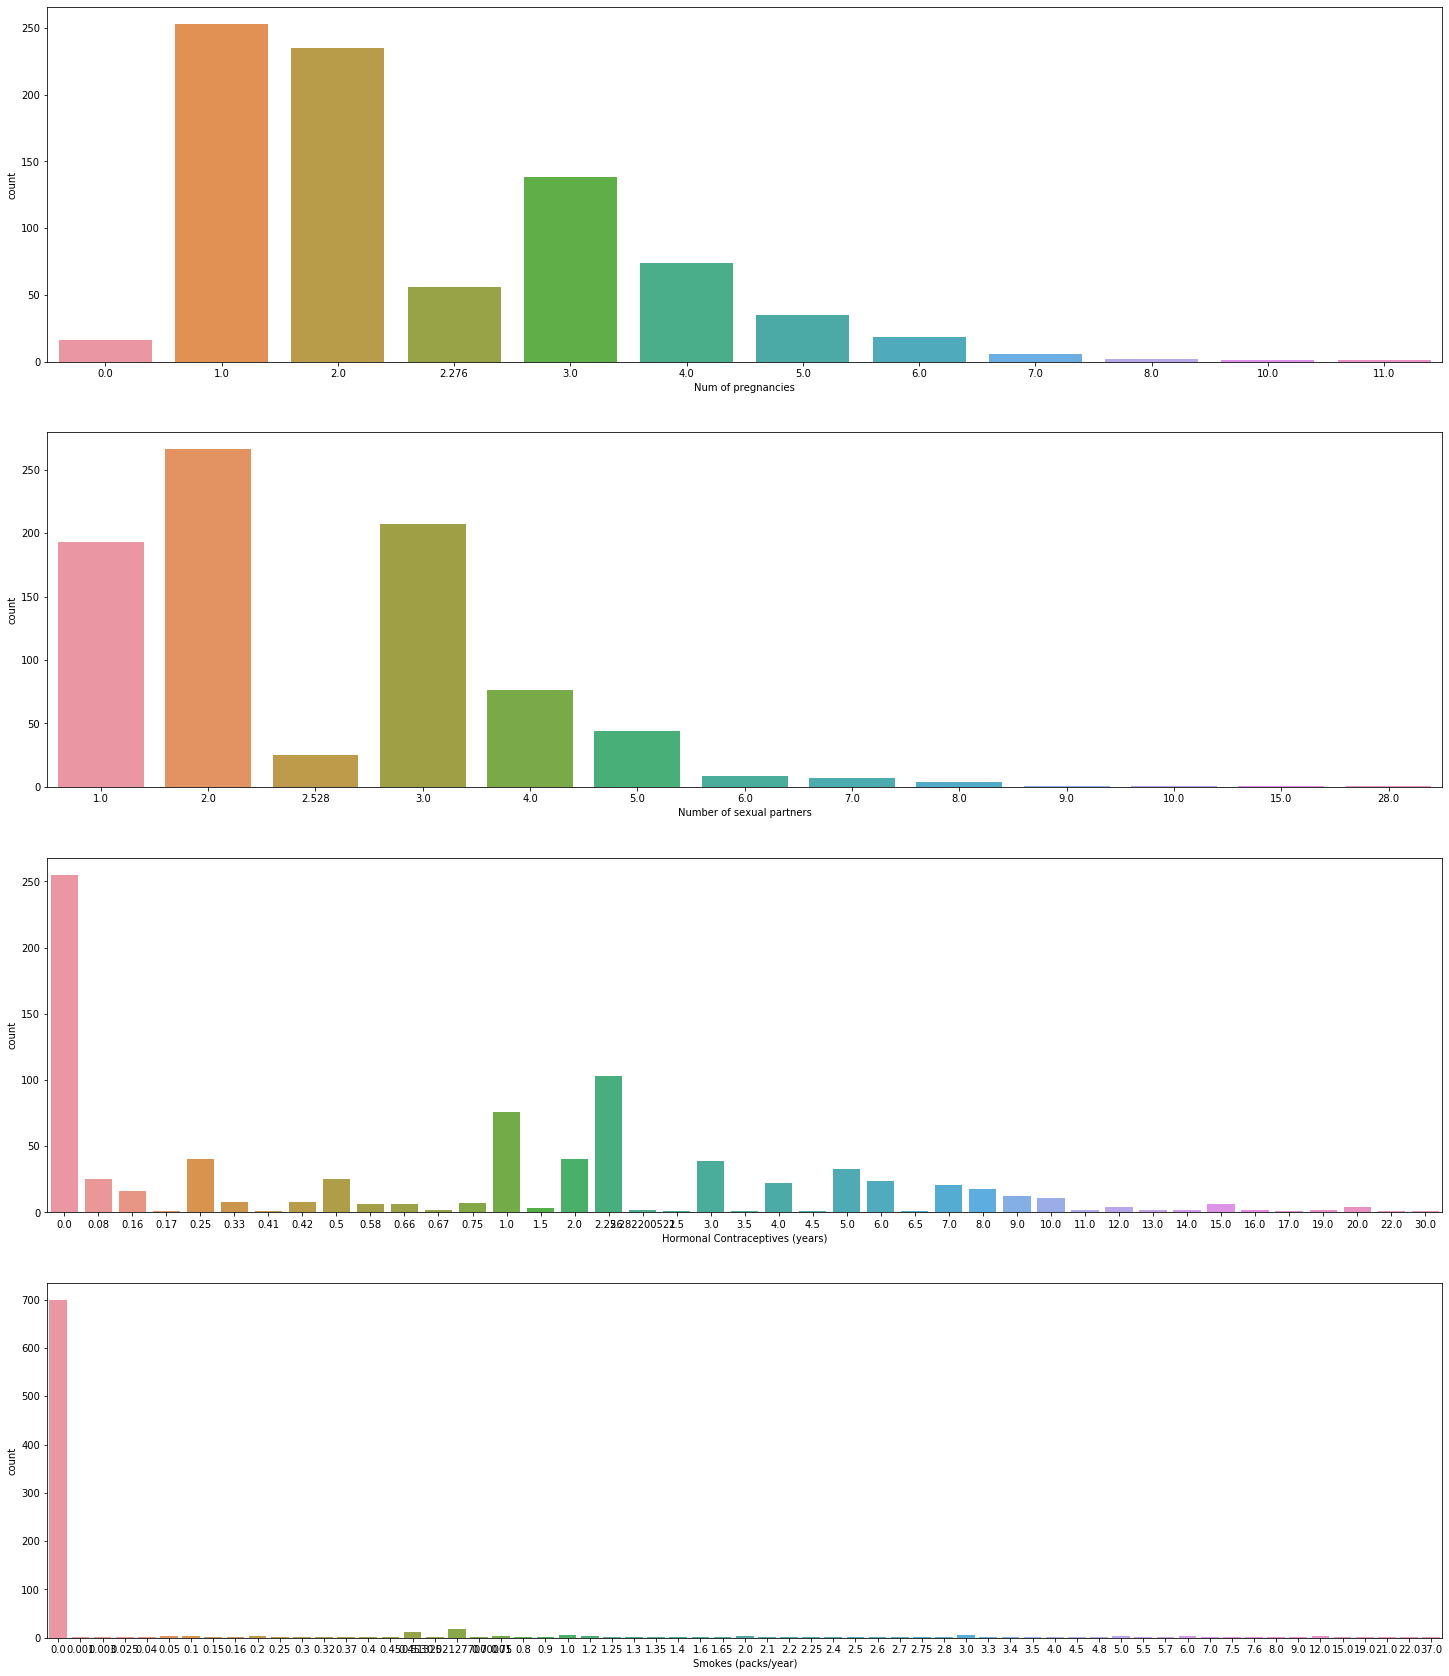

In [30]:
f, axs=mplt.subplots(4, 1, figsize=(25,30))
sbrn.countplot(x="Num of pregnancies", data=pnd_data_frame, ax=axs[0]);
sbrn.countplot(x="Number of sexual partners", data=pnd_data_frame, ax=axs[1]);
sbrn.countplot(x="Hormonal Contraceptives (years)", data=pnd_data_frame, ax=axs[2]);
sbrn.countplot(x="Smokes (packs/year)", data=pnd_data_frame, ax=axs[3]);

In [31]:
total=pnd_data_frame["Biopsy"].value_counts()
print(total)

0    781
1     54
Name: Biopsy, dtype: int64


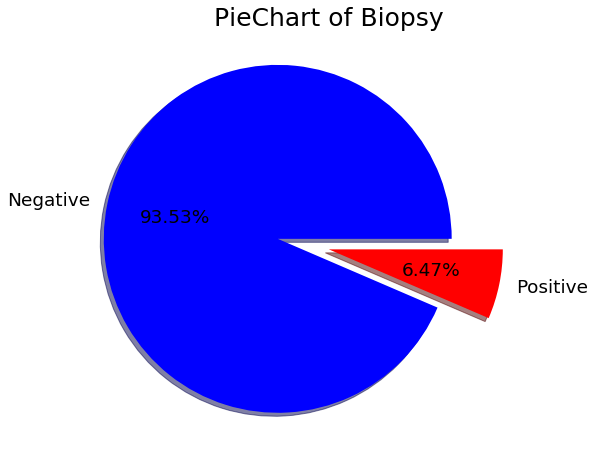

In [32]:
mplt.figure(figsize=(8,8))
tag=["Negative", "Positive"]
slice1=[0.3,0]
pie_color=["blue", "red"]
mplt.pie(total, labels=tag, explode=slice1,autopct="%1.2f%%",
         shadow=True, textprops={"fontsize": 18.5},
         colors=pie_color);
mplt.title("PieChart of Biopsy", fontsize=25);

# Best features selection

In [33]:
top_features=fs.SelectKBest(score_func=fs.chi2, k=15)
v=pnd_data_frame["Biopsy"]          
U=pnd_data_frame.drop(["Biopsy"], axis=1)
mod1=top_features.fit(U,v)

In [35]:
result_df=pnd.DataFrame(mod1.scores_)
columns_df=pnd.DataFrame(U.columns)
c_all=pnd.concat([columns_df, result_df], axis=1)
c_all.columns=["Best_Features", "Chi2-score"]
top_best_features=c_all.sort_values("Chi2-score", ascending=False)

In [1]:
top_best_features.reset_index(drop=True)
top_best_features.index=nmp.arange(1, len(top_best_features)+1)
top_best_features.head(30)

NameError: name 'top_best_features' is not defined

# Feature Importance

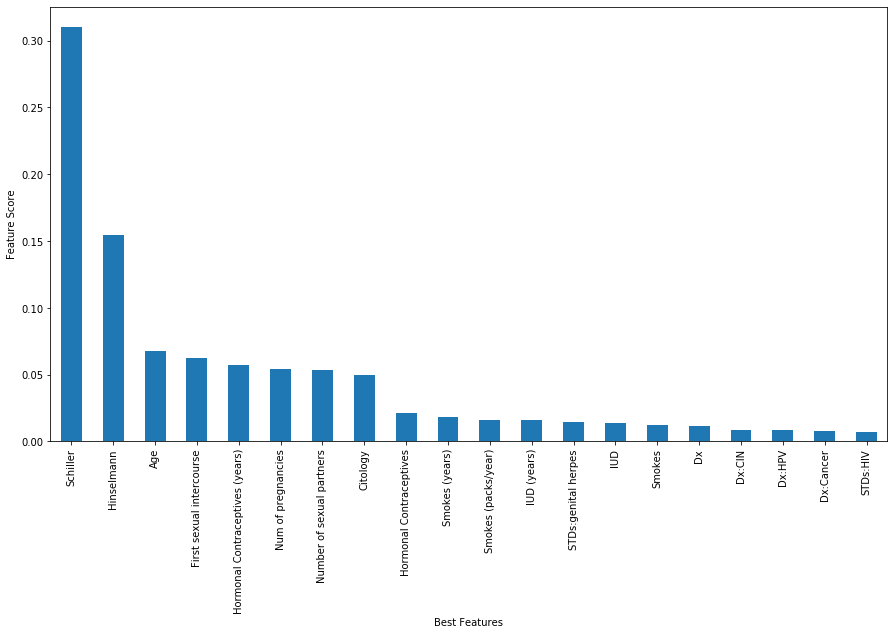

In [47]:
p_mod = ExtraTreesClassifier()
p_mod.fit(U,v)
p_mod.feature_importances_ 
mplt.figure(figsize=(15,8))
imp_feature = pnd.Series(p_mod.feature_importances_, index=U.columns)
mplt.xticks(rotation=50)
imp_feature.nlargest(20).plot.bar();
mplt.xlabel("Best Features")
mplt.ylabel("Feature Score");

# Splitting Data

In [37]:
U_train, U_test, v_train, v_test = train_test_split(U, v, test_size = 0.2, random_state=37)
print(U_test.shape)
print(U_train.shape)

(167, 33)
(668, 33)


In [38]:
U_train.shape

(668, 33)

In [39]:
v_train.shape

(668,)

In [40]:
U_test.shape

(167, 33)

In [41]:
v_test.shape

(167,)

# Model Creation

### 1. Model

In [42]:
model_svm=LinearSVC(max_iter=1000)
model_svm=CalibratedClassifierCV(model_svm)
clf=model_svm.fit(U_train,v_train)

In [43]:
y_predict=clf.predict(U_test)
print([y_predict])

[array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])]


In [44]:
print("SVM model Accuracy: {}%".format(round(accuracy_score(v_test, y_predict)*100, 2)))

SVM model Accuracy: 96.41%


In [45]:
df_y_predict=pnd.DataFrame(y_predict, columns=["Predicted Values"])

In [46]:
v1=[v_test]
v2=pnd.DataFrame(v_test)

In [47]:
v2=v2.reset_index(drop=True)

In [48]:
f123=[v2, df_y_predict]

In [49]:
Comparision_df=pnd.concat(f123, axis=1)
Comparision_df.sample(5)

,Biopsy,Predicted Values
156,0,0
119,0,0
95,0,0
20,0,0
139,0,0


In [61]:
Comparision_df=Comparision_df.rename(columns={"Biopsy": "Actual Values"})
Comparison_Column=nmp.where(Comparision_df["Actual Values"]==Comparision_df["Predicted Values"], True, False)
Comparision_df["Matching"]= Comparison_Column
Comparision_df.sample(10)

,Actual Values,Predicted Values,Matching
124,0,0,True
102,0,0,True
0,0,0,True
14,0,0,True
32,0,0,True
135,0,0,True
73,0,0,True
20,0,0,True
26,1,1,True
64,0,1,False


In [62]:
Comparision_df["Matching"].value_counts()

True     161
False      6
Name: Matching, dtype: int64

In [63]:
confusion_matrix(v_test, y_predict)

array([[158,   5],
       [  1,   3]])

In [64]:
print(classification_report(v_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       163
           1       0.38      0.75      0.50         4

    accuracy                           0.96       167
   macro avg       0.68      0.86      0.74       167
weighted avg       0.98      0.96      0.97       167



In [65]:
e=classification_report(v_test,y_predict, output_dict=True)
d_svm = round(pnd.DataFrame(e).transpose(), 2)

In [66]:
d_svm

,precision,recall,f1-score,support
0,0.99,0.97,0.98,163.00
1,0.38,0.75,0.50,4.00
accuracy,0.96,0.96,0.96,0.96
macro avg,0.68,0.86,0.74,167.00
weighted avg,0.98,0.96,0.97,167.00


### 2. Model

In [67]:
model_knn=KNeighborsClassifier()
knnn=model_knn.fit(U_train,v_train)
y_predict2=model_knn.predict(U_test)

In [68]:
print("KNN model Accuracy: {}%".format(round(accuracy_score(v_test, y_predict2)*100, 2)))

KNN model Accuracy: 97.6%


In [69]:
print(classification_report(v_test,y_predict2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       163
           1       0.00      0.00      0.00         4

    accuracy                           0.98       167
   macro avg       0.49      0.50      0.49       167
weighted avg       0.95      0.98      0.96       167



In [70]:
df_y_predict2=pnd.DataFrame(y_predict2, columns=["Predicted Values"])

In [71]:
f1234=[v2, df_y_predict2]

In [72]:
Comparision_df2=pnd.concat(f1234, axis=1)
Comparision_df2.sample(5)

,Biopsy,Predicted Values
34,0,0
73,0,0
43,0,0
102,0,0
158,0,0


In [80]:
Comparision_df2=Comparision_df.rename(columns={"Biopsy": "Actual Values"})
Comparison_Column2=nmp.where(Comparision_df2["Actual Values"]==Comparision_df2["Predicted Values"], True, False)
Comparision_df2["Matching"]= Comparison_Column2
Comparision_df2.sample(10)

,Actual Values,Predicted Values,Matching
21,0,0,True
15,1,1,True
118,0,0,True
159,1,1,True
27,0,0,True
67,0,0,True
26,1,1,True
84,0,0,True
87,0,0,True
49,0,0,True


In [82]:
Comparision_df2["Matching"].value_counts()

True     161
False      6
Name: Matching, dtype: int64

In [83]:
confusion_matrix(v_test, y_predict2)

array([[163,   0],
       [  4,   0]])

In [84]:
a=classification_report(v_test,y_predict2, output_dict=True)

In [85]:
d_knn = round(pnd.DataFrame(a).transpose(), 2)

In [86]:
d_knn

,precision,recall,f1-score,support
0,0.98,1.00,0.99,163.00
1,0.00,0.00,0.00,4.00
accuracy,0.98,0.98,0.98,0.98
macro avg,0.49,0.50,0.49,167.00
weighted avg,0.95,0.98,0.96,167.00


In [87]:
from sklearn.metrics import roc_curve

In [88]:
fpr3, tpr3, thresh3 = roc_curve(v_test, model_knn.predict_proba(U_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(v_test, model_svm.predict_proba(U_test)[:, 1], pos_label = 1)

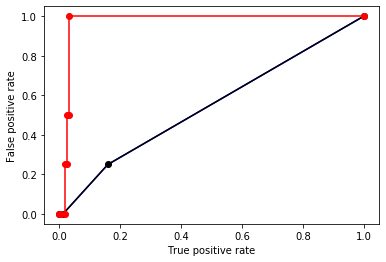

In [89]:
mplt.plot(fpr3, tpr3, marker='', color = "blue", label = "KNN")
mplt.plot(fpr3, tpr3, marker = "o", color= "black", label="No-Skill")
mplt.plot(fpr2, tpr2, marker="o", color = "red", label = "SVM");
mplt.xlabel("True positive rate")
mplt.ylabel("False positive rate");

# comparison

In [90]:
knn1=round(accuracy_score(v_test, y_predict2)*100, 2)
svm1=round(accuracy_score(v_test, y_predict)*100, 2)

In [91]:
mlist1=[svm1]
mlist2=[knn1]

In [93]:
c_df1=pnd.DataFrame(mlist1, columns={"SVM"}).astype(str) + '%'
c_df2=pnd.DataFrame(mlist2, columns={"KNN"}).astype(str) + '%'

In [94]:
f_list=[c_df1, c_df2]

In [95]:
svm_knn=pnd.concat(f_list, axis=1)

In [96]:
svm_knn=svm_knn.rename(index={0: "Accuracy"})

In [97]:
svm_knn

,SVM,KNN
Accuracy,96.41%,97.6%
